# 10_nonparametric_kruskal_wallis

### Exercise: Perform Kruskal-Wallis test and plot a box plot for DIC and temperature data.

In [1]:
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [2]:
# Path to the file to be imported
path = "E:\prueba\Terminos_lagoon_TA_DIC_2023_RawData.csv"

# Import the file
co2_data = import_csv(path)

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\INDIRA\AppData\Local\Temp\ipykernel_10140\1381770234.py:2: SyntaxWarning: invalid escape sequence '\p'
  path = "E:\prueba\Terminos_lagoon_TA_DIC_2023_RawData.csv"


In [3]:
from scipy.stats import kruskal
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# --- 1. Función para Kruskal-Wallis ---
def kruskal_wallis_test(*groups, alpha=0.05):
    """
    Performs the Kruskal-Wallis H-test for independent samples.
    Accepts multiple groups as arguments.
    Prints the H statistic, p-value, and interpretation.
    """
    result = kruskal(*groups)
    
    print(f"H statistic = {result.statistic:.4f}")
    print(f"p-value = {result.pvalue:.5f}")
    
    if result.pvalue < alpha:
        print("The difference between groups is statistically significant.")
    else:
        print("No statistically significant difference between groups.")

# --- 2. Función para Dunn post-hoc ---
def dunn_posthoc(data, group_col, value_col, p_adjust='bonferroni'):
    """
    Runs Dunn's post-hoc test after Kruskal-Wallis.
    """
    result = sp.posthoc_dunn(data, val_col=value_col, group_col=group_col, p_adjust=p_adjust)
    print(result)
    return result

C:\Users\INDIRA\AppData\Local\Temp\ipykernel_10140\2772797916.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='area', y='dic_micromol_kg', data=co2_data, palette="Set2")


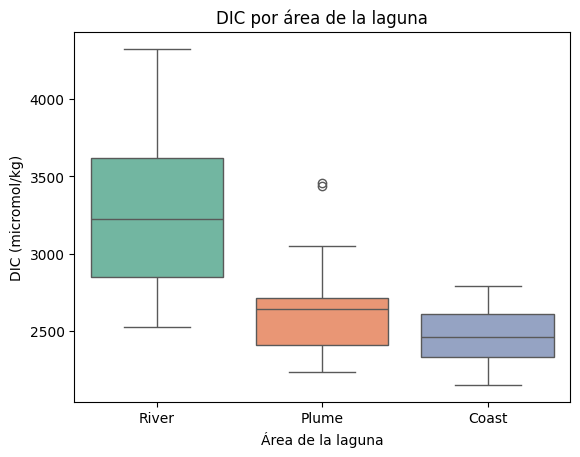

In [11]:
# -------------------------------
# DIC (Dissolved Inorganic Carbon)
# -------------------------------

# Boxplot por área
sns.boxplot(x='area', y='dic_micromol_kg', data=co2_data, palette="Set2")
plt.xlabel('Área de la laguna')
plt.ylabel('DIC (micromol/kg)')
plt.title('DIC por área de la laguna')
plt.show()


In [12]:
# Grupos por área
dic_river = co2_data[co2_data['area'] == 'River']['dic_micromol_kg']
dic_plume = co2_data[co2_data['area'] == 'Plume']['dic_micromol_kg']
dic_coast = co2_data[co2_data['area'] == 'Coast']['dic_micromol_kg']



In [13]:
# Test de Kruskal-Wallis
print("=== Kruskal-Wallis para DIC ===")
kruskal_wallis_test(dic_river, dic_plume, dic_coast)

# Post-hoc Dunn
print("\n=== Post-hoc Dunn para DIC ===")
dunn_posthoc(co2_data, 'area', 'dic_micromol_kg')

=== Kruskal-Wallis para DIC ===
H statistic = 55.8897
p-value = 0.00000
The difference between groups is statistically significant.

=== Post-hoc Dunn para DIC ===
              Coast     Plume         River
Coast  1.000000e+00  0.063144  7.204720e-13
Plume  6.314392e-02  1.000000  1.885873e-06
River  7.204720e-13  0.000002  1.000000e+00


,Coast,Plume,River
Coast,1.000000e+00,0.063144,7.204720e-13
Plume,6.314392e-02,1.000000,1.885873e-06
River,7.204720e-13,0.000002,1.000000e+00


C:\Users\INDIRA\AppData\Local\Temp\ipykernel_10140\1258040439.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='area', y='temp_c', data=co2_data, palette="coolwarm")


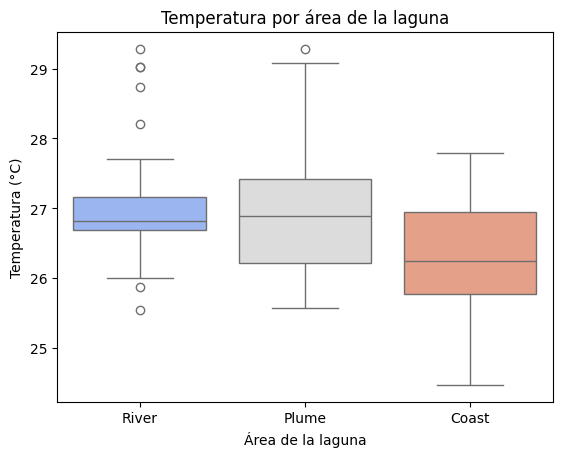

In [7]:
# -------------------------------
# Temperature
# -------------------------------

# Boxplot por área
sns.boxplot(x='area', y='temp_c', data=co2_data, palette="coolwarm")
plt.xlabel('Área de la laguna')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura por área de la laguna')
plt.show()

In [8]:
# -------------------------------
# Kruskal-Wallis test (Temperature)
# -------------------------------

# Extraer datos por área
temp_river = co2_data[co2_data['area'] == 'River']['temp_c']
temp_plume = co2_data[co2_data['area'] == 'Plume']['temp_c']
temp_coast = co2_data[co2_data['area'] == 'Coast']['temp_c']

In [14]:
# Prueba de Kruskal-Wallis
stat, p = kruskal(temp_river, temp_plume, temp_coast)
print("Kruskal-Wallis Test (Temperatura):")
print("Estadístico H = {:.3f}, p = {:.4f}".format(stat, p))

# Interpretación
alpha = 0.05
if p < alpha:
    print("Resultado: Diferencias significativas entre al menos dos áreas (p < 0.05).")
else:
    print("Resultado: No se encontraron diferencias significativas (p ≥ 0.05).")


Kruskal-Wallis Test (Temperatura):
Estadístico H = 7.700, p = 0.0213
Resultado: Diferencias significativas entre al menos dos áreas (p < 0.05).


In [10]:
# -------------------------------
# Dunn post-hoc (Temperature)
# -------------------------------

dunn_result = sp.posthoc_dunn(
    co2_data, 
    val_col='temp_c', 
    group_col='area', 
    p_adjust='bonferroni'
)

print("\nResultados post-hoc de Dunn (Temperatura):")
print(dunn_result)


Resultados post-hoc de Dunn (Temperatura):
          Coast    Plume     River
Coast  1.000000  0.06468  0.038761
Plume  0.064680  1.00000  1.000000
River  0.038761  1.00000  1.000000
